In [1]:
# import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
import yfinance as yf
import pandas as pd

# Specify the trading pair, timeframe, and date range
symbol = 'BTC-USD'
timeframe = '1d'
start_date = '2018-01-01'
end_date = '2022-01-31'

# Fetch historical data using yfinance
btc_data = yf.download(symbol, start=start_date, end=end_date)

# Resample to the desired timeframe ('6h' for 6-hour interval)
btc_data_resampled = btc_data.resample(timeframe).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Adj Close': 'last',
    'Volume': 'sum'
})

# Display the fetched data
print(btc_data_resampled)

# Save the data to a CSV file
btc_data_resampled.to_csv('btc_usd_data.csv')

[*********************100%%**********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   
...                  ...           ...           ...           ...   
2022-01-26  36950.515625  38825.410156  36374.906250  36852.121094   
2022-01-27  36841.878906  37148.324219  35629.281250  37138.234375   
2022-01-28  37128.445312  37952.878906  36211.109375  37784.332031   
2022-01-29  37780.714844  38576.261719  37406.472656  38138.179688   
2022-01-30  38151.917969  38266.339844  37437.710938  37917.601562   

               Adj C

In [3]:
maindf = pd.read_csv('btc_usd_data.csv')
maindf

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072
...,...,...,...,...,...,...,...
1486,2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034
1487,2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629
1488,2022-01-28,37128.445312,37952.878906,36211.109375,37784.332031,37784.332031,22238830523
1489,2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075


In [4]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  1491
Total number of fields present in the dataset:  7


In [5]:
maindf.shape

(1491, 7)

In [6]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [7]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1486,2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034
1487,2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629
1488,2022-01-28,37128.445312,37952.878906,36211.109375,37784.332031,37784.332031,22238830523
1489,2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075
1490,2022-01-30,38151.917969,38266.339844,37437.710938,37917.601562,37917.601562,14643548444


In [8]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1491 non-null   object 
 1   Open       1491 non-null   float64
 2   High       1491 non-null   float64
 3   Low        1491 non-null   float64
 4   Close      1491 non-null   float64
 5   Adj Close  1491 non-null   float64
 6   Volume     1491 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 81.7+ KB


In [9]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1.491000e+03
mean,18821.611592,19315.184733,18264.990887,18834.535578,18834.535578,2.583597e+10
std,17876.586972,18362.900800,17308.753528,17877.281815,17877.281815,2.104253e+10
min,3236.274658,3275.377930,3191.303467,3236.761719,3236.761719,2.923670e+09
25%,7183.078369,7320.043701,6938.703369,7182.919678,7182.919678,8.463315e+09
50%,9539.485352,9711.889648,9349.545898,9538.024414,9538.024414,2.248291e+10
75%,32643.937500,33883.109375,31225.665039,32742.024414,32742.024414,3.620891e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [10]:
print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())

Null Values: 0
NA values: False


In [11]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2018-01-01
Ending Date 2022-01-30


StockPrice Analysis from Start

Analysis of Year 2018

In [12]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2018 = maindf.loc[(maindf['Date'] >= '2018-01-01')
                     & (maindf['Date'] <= '2018-12-31')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000
...,...,...,...,...,...
360,2018-12-27,3854.688477,3874.416992,3645.448486,3654.833496
361,2018-12-28,3653.131836,3956.135986,3642.632080,3923.918701
362,2018-12-29,3932.491699,3963.758789,3820.408691,3820.408691
363,2018-12-30,3822.384766,3901.908936,3797.219238,3865.952637


In [13]:
monthvise= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)

In [14]:
y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2018.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [15]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2018, x=y_2018.Date, y=[y_2018['Open'], y_2018['Close'],
                                          y_2018['High'], y_2018['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

**Analysis of Year 2019**

In [16]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2019 = maindf.loc[(maindf['Date'] >= '2019-01-01')
                     & (maindf['Date'] <= '2019-12-31')]

y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
365,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020
366,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424
367,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211
368,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529
369,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580
...,...,...,...,...,...
725,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379
726,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234
727,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832
728,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117


In [17]:
monthvise= y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,3709.705645,3701.554963
February,3697.178327,3711.907261
March,3967.740400,3976.069100
April,5136.813314,5178.469434
May,7205.208024,7309.694131
June,9339.480322,9415.900179
July,10691.706055,10669.336158
August,10657.745621,10643.248362
September,9858.141813,9814.067871


In [18]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [19]:
y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2019.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [20]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2019, x=y_2019.Date, y=[y_2019['Open'], y_2019['Close'],
                                          y_2019['High'], y_2019['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

**Analysis of Year 2020**

In [21]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2020 = maindf.loc[(maindf['Date'] >= '2020-01-01')
                     & (maindf['Date'] < '2021-01-01')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
730,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316
731,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215
732,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277
733,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738
734,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383
...,...,...,...,...,...
1091,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922
1092,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594
1093,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500
1094,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125


In [22]:
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,8318.949597,8389.270476
February,9656.215113,9630.722185
March,6943.507009,6871.016113
April,7150.611328,7224.477327
May,9237.761530,9263.151745
June,9499.797005,9489.227214
July,9519.383852,9589.899729
August,11639.097215,11652.394185
September,10689.700163,10660.276855


In [23]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [24]:
y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2020.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [25]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Open'], y_2020['Close'],
                                          y_2020['High'], y_2020['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

**Analysis of Year 2021**

In [26]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2021 = maindf.loc[(maindf['Date'] >= '2021-01-01')
                     & (maindf['Date'] < '2022-01-01')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1096,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344
1097,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578
1098,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438
1099,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062
1100,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688
...,...,...,...,...,...
1456,2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969
1457,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469
1458,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938
1459,2021-12-30,46490.605469,47879.964844,46060.312500,47178.125000


In [27]:
monthvise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,34652.961694,34761.649950
February,45874.967215,46306.798968
March,54544.678175,54998.008695
April,57251.256250,57206.720052
May,47105.828503,46443.286668
June,35920.546940,35845.154687
July,34234.212450,34444.973790
August,45516.119834,45709.022681
September,46041.859375,45939.771484


In [28]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [29]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2021.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [30]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'],
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

**Analysis of Year 2022**

In [31]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2022 = maindf.loc[(maindf['Date'] >= '2022-01-01')]

y_2022.drop(y_2022[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1461,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500
1462,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750
1463,2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188
1464,2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219
1465,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906
1466,2022-01-06,43565.511719,43748.718750,42645.539062,43160.929688
1467,2022-01-07,43153.570312,43153.570312,41077.445312,41557.902344
1468,2022-01-08,41561.464844,42228.941406,40672.277344,41733.941406
1469,2022-01-09,41734.726562,42663.949219,41338.160156,41911.601562
1470,2022-01-10,41910.230469,42199.484375,39796.570312,41821.261719


In [32]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()

monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,41482.99987,41202.132292
February,NaN,NaN
March,NaN,NaN
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,NaN,NaN


In [33]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [34]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [35]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'],
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

**Overall Analysis from 2014-2022**

In [36]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2018-01-01')
                     & (maindf['Date'] <= '2022-01-31')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000
...,...,...,...,...,...
1486,2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094
1487,2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375
1488,2022-01-28,37128.445312,37952.878906,36211.109375,37784.332031
1489,2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688


In [37]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,20137.626116,20091.837705
February,17106.133763,17212.661504
March,18653.129326,18721.412751
April,19375.574801,19410.815861
May,18013.509683,17866.782569
June,15397.270561,15385.947437
July,15386.692202,15462.639916
August,18634.190906,18676.198793
September,18303.130672,18256.197811


In [38]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

**Building LSTM Model**

Since Bitcoin price has drastically flucated from 2018 to 2021, so we will just consider 1 Year to avoid this type of flucation in the data.


In [39]:
# Lets First Take all the Close Price
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1491, 2)


In [40]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [41]:
closedf = closedf[closedf['Date'] > '2021-01-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  394


In [42]:
closedf

,Date,Close
1097,2021-01-02,32127.267578
1098,2021-01-03,32782.023438
1099,2021-01-04,31971.914062
1100,2021-01-05,33992.429688
1101,2021-01-06,36824.363281
...,...,...
1486,2022-01-26,36852.121094
1487,2022-01-27,37138.234375
1488,2022-01-28,37784.332031
1489,2022-01-29,38138.179688


In [43]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [44]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(394, 1)


In [45]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (236, 1)
test_data:  (158, 1)


In [46]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [47]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (220, 15)
y_train:  (220,)
X_test:  (142, 15)
y_test (142,)


In [48]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (220, 15, 1)
X_test:  (142, 15, 1)


**Model building**

In [49]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [50]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
7/7 [==============================] - 2s 57ms/step - loss: 0.1747 - val_loss: 0.2581
Epoch 2/200
7/7 [==============================] - 0s 13ms/step - loss: 0.1431 - val_loss: 0.2084
Epoch 3/200
7/7 [==============================] - 0s 13ms/step - loss: 0.1126 - val_loss: 0.1570
Epoch 4/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0824 - val_loss: 0.1068
Epoch 5/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0536 - val_loss: 0.0618
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0326 - val_loss: 0.0273
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0197 - val_loss: 0.0130
Epoch 8/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0170 - val_loss: 0.0120
Epoch 9/200
7/7 [==============================] - 0s 13ms/step - loss: 0.0162 - val_loss: 0.0108
Epoch 10/200
7/7 [==============================] - 0s 16ms/step - loss: 0.0145 - val_loss: 0.0115
Epoch 11/200
7/7 [=

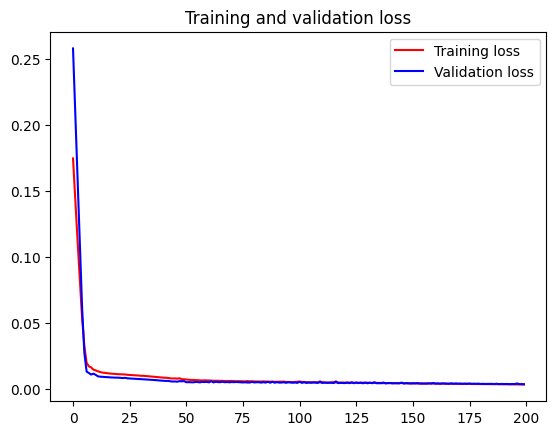

<Figure size 640x480 with 0 Axes>

In [51]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [52]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 3ms/step


((220, 1), (142, 1))

In [53]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [54]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  2147.421150787765
Train data MSE:  4611417.598850649
Train data MAE:  1677.007430752841
-------------------------------------------------------------------------------------
Test data RMSE:  2214.50823975112
Test data MSE:  4904046.743925605
Test data MAE:  1700.1897832306338


In [55]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9513627640035344
Test data explained variance regression score: 0.9302517967896073


In [56]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9510306032261379
Test data R2 score: 0.9288383929537858


In [57]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.002490668384033633
Test data MGD:  0.0020044138508106893
----------------------------------------------------------------------
Train data MPD:  105.22071565718235
Test data MPD:  98.03332199267626


**Comparing the original stock close price and predicted close price**

In [58]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (394, 1)
Test predicted data:  (394, 1)


**Predicting the next 30 days**

In [59]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [60]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [61]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

**Plotting entire Closing Stock Price with next 30 days period of prediction**

In [62]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [63]:

trade_data = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
trade_data

,date,original_close,predicted_close
1097,2021-01-02,32127.267578,NaN
1098,2021-01-03,32782.023438,NaN
1099,2021-01-04,31971.914062,NaN
1100,2021-01-05,33992.429688,NaN
1101,2021-01-06,36824.363281,NaN
...,...,...,...
1486,2022-01-26,36852.121094,37117.871094
1487,2022-01-27,37138.234375,37036.578125
1488,2022-01-28,37784.332031,37158.468750
1489,2022-01-29,38138.179688,37520.179688


In [64]:
model.save('btc_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [65]:
def load_lstm_model(model_path='btc_model.h5'):
    model = load_model(model_path)
    return model

**Defining strategy to generate buy, sell, hold signals**

Here we are using rsi(Relative Strength Index)

Buy Signals: 57
Sell Signals: 38
Hold Signals: 299


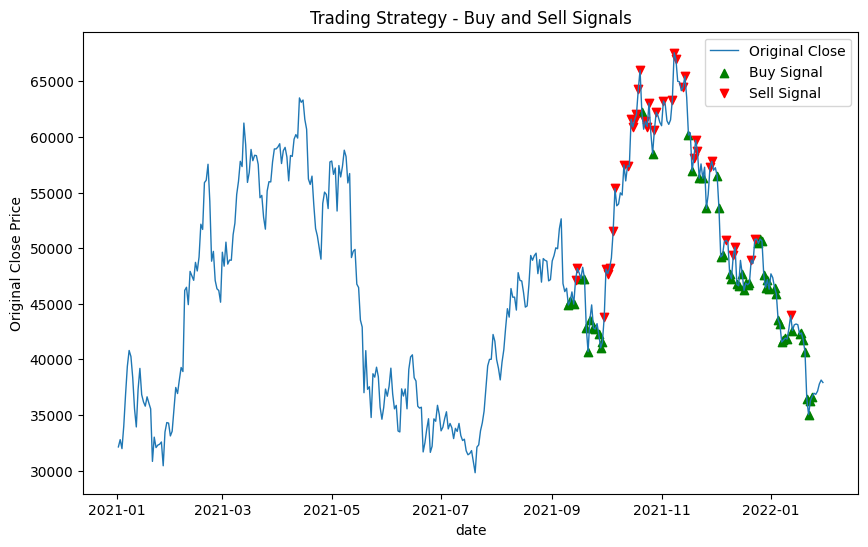

In [66]:

# Create a column 'Signal' based on the strategy
trade_data['Signal'] = 0  # Initially set all signals to 'Hold'

# Generate Buy signals when predicted_close is higher than original_close by a certain threshold
buy_threshold = 0.02  # Adjust the threshold as needed
trade_data.loc[trade_data['predicted_close'] > (1 + buy_threshold) * trade_data['original_close'], 'Signal'] = 1

# Generate Sell signals when predicted_close is lower than original_close by a certain threshold
sell_threshold = 0.02  # Adjust the threshold as needed
trade_data.loc[trade_data['predicted_close'] < (1 - sell_threshold) * trade_data['original_close'], 'Signal'] = -1

# Print the count of Buy, Sell, and Hold signals
print("Buy Signals:", len(trade_data[trade_data['Signal'] == 1]))
print("Sell Signals:", len(trade_data[trade_data['Signal'] == -1]))
print("Hold Signals:", len(trade_data[trade_data['Signal'] == 0]))

# Plot the Buy and Sell signals on the original close prices
plt.figure(figsize=(10, 6))
plt.plot(trade_data['date'], trade_data['original_close'], label='Original Close', linewidth=1)
plt.scatter(trade_data[trade_data['Signal'] == 1]['date'],
            trade_data[trade_data['Signal'] == 1]['original_close'],
            marker='^', color='g', label='Buy Signal')
plt.scatter(trade_data[trade_data['Signal'] == -1]['date'],
            trade_data[trade_data['Signal'] == -1]['original_close'],
            marker='v', color='r', label='Sell Signal')
plt.title('Trading Strategy - Buy and Sell Signals')
plt.xlabel('date')
plt.ylabel('Original Close Price')
plt.legend()
plt.show()


**Calculating entry prices**

In [67]:
def calculate_entry_price(df):
    # Initialize Entry_Price column
    df['Entry_Price'] = 0

    for i in range(1, len(df)):
        if df['Signal'].iloc[i] == 1:  # Buy (Long) signal
            df.loc[df.index[i], 'Entry_Price'] = df['predicted_close'].iloc[i]
        elif df['Signal'].iloc[i] == -1:  # Sell (Short) signal
            df.loc[df.index[i], 'Entry_Price'] = df['predicted_close'].iloc[i]

    return df

if 'Signal' in trade_data.columns:
    trade_data = calculate_entry_price(trade_data)
    print(trade_data[['date', 'original_close', 'predicted_close', 'Signal', 'Entry_Price']])
else:
    print("No 'Signal' column found in the 'trade_data' DataFrame.")

           date  original_close  predicted_close  Signal  Entry_Price
1097 2021-01-02    32127.267578              NaN       0          0.0
1098 2021-01-03    32782.023438              NaN       0          0.0
1099 2021-01-04    31971.914062              NaN       0          0.0
1100 2021-01-05    33992.429688              NaN       0          0.0
1101 2021-01-06    36824.363281              NaN       0          0.0
...         ...             ...              ...     ...          ...
1486 2022-01-26    36852.121094     37117.871094       0          0.0
1487 2022-01-27    37138.234375     37036.578125       0          0.0
1488 2022-01-28    37784.332031     37158.468750       0          0.0
1489 2022-01-29    38138.179688     37520.179688       0          0.0
1490 2022-01-30    37917.601562              NaN       0          0.0

[394 rows x 5 columns]


**Calculating the exit price based on the risk management strategy**

Here we are using Fixed Percentage Profit/Loss strategy

In [68]:
def exit_fixed_percentage(trade_data, profit_percent, loss_percent):
    trade_data['Exit_Price'] = 0
    trade_data.loc[trade_data['Signal'] == 1, 'Exit_Price'] = trade_data['Entry_Price'] * (1 + profit_percent / 100)
    trade_data.loc[trade_data['Signal'] == -1, 'Exit_Price'] = trade_data['Entry_Price'] * (1 - loss_percent / 100)
    return trade_data

trade_data = exit_fixed_percentage(trade_data, 5, 2)
# Filter out rows with 'Hold' signals (Signal == 0)
trade_data = trade_data[trade_data['Signal'] != 0]
print(trade_data[['date', 'original_close', 'Signal', 'Entry_Price', 'Exit_Price']])

           date  original_close  Signal   Entry_Price    Exit_Price
1348 2021-09-10    44883.910156       1  48107.667969  50513.051367
1349 2021-09-11    45201.457031       1  46691.480469  49026.054492
1351 2021-09-13    44963.074219       1  46156.128906  48463.935352
1352 2021-09-14    47092.492188      -1  45785.617188  44869.904844
1353 2021-09-15    48176.347656      -1  46676.718750  45743.184375
...         ...             ...     ...           ...           ...
1480 2022-01-20    40680.417969       1  43353.546875  45521.224219
1481 2022-01-21    36457.316406       1  42663.917969  44797.113867
1482 2022-01-22    35030.250000       1  40458.421875  42481.342969
1483 2022-01-23    36276.804688       1  38511.371094  40436.939648
1484 2022-01-24    36654.328125       1  37713.242188  39598.904297

[95 rows x 5 columns]


**Take the initial capital amount input from the user and calulate the required metrics**

1. Gross Profit
2. Net Profit
3. Total Closed Trades
4. Win Rate (Profitability %)
5. Max Drawdown
6. Gross Loss
7. Average Winning Trade (in USDT)
8. Average Losing Trade (in USDT)
9. Buy and Hold Return of BTC
10. Largest Losing Trade (in USDT)
11. Largest Winning Trade (in USDT)
12. Sharpe Ratio
13. Sortino Ratio
14. Average Holding Duration per Trade
15. Max Dip and Average Dip in Running Trade

In [72]:
def calculate_metrics(trade_data, initial_capital):
    # Calculate additional columns: 'Volume', 'Trade_Return', 'Trade_Duration'
    trade_data['Volume'] = initial_capital / trade_data['Entry_Price']
    trade_data['Trade_Return'] = (trade_data['Exit_Price'] - trade_data['Entry_Price']) * trade_data['Volume']
    trade_data['Trade_Duration'] = trade_data['date'].diff().dt.days

    # Filter out rows with 'Hold' signals (Signal == 0)
    closed_trades = trade_data[trade_data['Signal'] != 0]

    # Calculate metrics
    gross_profit = closed_trades[closed_trades['Trade_Return'] > 0]['Trade_Return'].sum()
    gross_loss = closed_trades[closed_trades['Trade_Return'] < 0]['Trade_Return'].sum()
    total_closed_trades = len(closed_trades)
    win_rate = len(closed_trades[closed_trades['Trade_Return'] > 0]) / total_closed_trades * 100
    max_drawdown = (closed_trades['Trade_Return'].cumsum().expanding().max() - closed_trades['Trade_Return'].cumsum()).max()
    net_profit = closed_trades['Trade_Return'].sum()
    avg_winning_trade = closed_trades[closed_trades['Trade_Return'] > 0]['Trade_Return'].mean()
    avg_losing_trade = closed_trades[closed_trades['Trade_Return'] < 0]['Trade_Return'].mean()
    buy_and_hold_return = (trade_data['original_close'].iloc[-1] - trade_data['original_close'].iloc[0]) / trade_data['original_close'].iloc[0] * 100
    largest_losing_trade = closed_trades[closed_trades['Trade_Return'] == closed_trades[closed_trades['Trade_Return'] < 0]['Trade_Return'].min()]
    largest_winning_trade = closed_trades[closed_trades['Trade_Return'] == closed_trades[closed_trades['Trade_Return'] > 0]['Trade_Return'].max()]
    sharpe_ratio = calculate_sharpe_ratio(closed_trades['Trade_Return'])
    sortino_ratio = calculate_sortino_ratio(closed_trades['Trade_Return'])

    # Average Holding Duration per Trade
    avg_holding_duration = closed_trades['Trade_Duration'].mean()

    # Max Dip and Average Dip in Running Trade
    max_dip = (closed_trades['Trade_Return'].cumsum().expanding().max() - closed_trades['Trade_Return'].cumsum()).min()
    avg_dip = (closed_trades['Trade_Return'].cumsum().expanding().mean() - closed_trades['Trade_Return'].cumsum()).min()

    # Display results
    print("Gross Profit:", gross_profit)
    print("Net Profit:", net_profit)
    print("Total Closed Trades:", total_closed_trades)
    print("Win Rate (Profitability %):", win_rate)
    print("Max Drawdown:", max_drawdown)
    print("Gross Loss:", gross_loss)
    print("Average Winning Trade (in USDT):", avg_winning_trade)
    print("Average Losing Trade (in USDT):", avg_losing_trade)
    print("Buy and Hold Return of BTC:", buy_and_hold_return)
    print("Largest Losing Trade (in USDT):", largest_losing_trade['Trade_Return'].iloc[0])
    print("Largest Winning Trade (in USDT):", largest_winning_trade['Trade_Return'].iloc[0])
    print("Sharpe Ratio:", sharpe_ratio)
    print("Sortino Ratio:", sortino_ratio)
    print("Average Holding Duration per Trade (in days):", avg_holding_duration)
    print("Max Dip in Running Trade:", max_dip)
    print("Average Dip in Running Trade:", avg_dip)

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    mean_return = returns.mean()
    std_dev_return = returns.std()
    sharpe_ratio = (mean_return / std_dev_return) * np.sqrt(252)  # Assuming 252 trading days in a year
    return sharpe_ratio

# Function to calculate Sortino Ratio
def calculate_sortino_ratio(returns):
    mean_return = returns.mean()
    downside_deviation = returns[returns < 0].std()
    sortino_ratio = (mean_return / downside_deviation) * np.sqrt(252)
    return sortino_ratio

# Also, 'initial_capital' is the initial capital provided by the user
initial_capital = float(input("Enter the initial capital: "))
calculate_metrics(trade_data, initial_capital)


Enter the initial capital: 100000
Gross Profit: 285000.00000000023
Net Profit: 209000.00000000017
Total Closed Trades: 95
Win Rate (Profitability %): 60.0
Max Drawdown: 40000.000000000044
Gross Loss: -76000.00000000007
Average Winning Trade (in USDT): 5000.000000000004
Average Losing Trade (in USDT): -2000.0000000000018
Buy and Hold Return of BTC: -18.335260904411303
Largest Losing Trade (in USDT): -2000.0000000000075
Largest Winning Trade (in USDT): 5000.000000000014
Sharpe Ratio: 10.130279186230627
Sortino Ratio: 8802352526411289.0
Average Holding Duration per Trade (in days): 1.446808510638298
Max Dip in Running Trade: 0.0
Average Dip in Running Trade: -136705.2631578948


<ipython-input-72-352f7630e4f2>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-352f7630e4f2>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-352f7630e4f2>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
max_drawdown_percentage = (max_drawdown / initial_capital) * 10
print("Maximum Drawdown (in percentage):", max_drawdown_percentage)

Maximum Drawdown (in percentage): -0.0004815466261758902


**All the trade data is recorded in an excel file**

In [80]:
output_file = 'trade_records.xlsx'
trade_data.to_excel(output_file, index=False)

In [74]:

def calculate_max_drawdown(df):
    df['Peak'] = df['original_close'].cummax()
    df['Drawdown'] = (df['original_close'] - df['Peak']) / df['Peak']

    max_drawdown = df['Drawdown'].min()

    return max_drawdown

# Assuming 'trade_data' DataFrame contains necessary columns including 'date', 'original_close'
max_drawdown = calculate_max_drawdown(trade_data)
print(f"Max Drawdown: {max_drawdown * 100:.2f}%")


Max Drawdown: -48.15%


<ipython-input-74-26e72ebd9baf>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-74-26e72ebd9baf>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:

def calculate_sharpe_ratio(df, risk_free_rate=0):
    df['Daily_Return'] = df['original_close'].pct_change()
    average_daily_return = df['Daily_Return'].mean()
    std_dev_daily_return = df['Daily_Return'].std()

    sharpe_ratio = (average_daily_return - risk_free_rate) / std_dev_daily_return

    return sharpe_ratio

# Assuming 'trade_data' DataFrame contains necessary columns including 'date', 'original_close'
sharpe_ratio = calculate_sharpe_ratio(trade_data)
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


Sharpe Ratio: -0.0350


<ipython-input-75-d6a911e7b983>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
def calculate_max_duration_time_days(df):
    df['date'] = pd.to_datetime(df['date'])
    df['Trade_Duration'] = df['date'].diff().dt.total_seconds().fillna(0)

    max_duration_time_seconds = df['Trade_Duration'].max()
    max_duration_time_days = max_duration_time_seconds / (24 * 60 * 60)  # Convert seconds to days

    return max_duration_time_days

# Assuming 'trade_data' DataFrame contains necessary columns including 'date'
max_duration_time_days = calculate_max_duration_time_days(trade_data)
print(f"Max Duration Time of Single Trade: {max_duration_time_days} days")


Max Duration Time of Single Trade: 5.0 days


<ipython-input-77-7e9b73dd2d5f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-7e9b73dd2d5f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

